In [15]:

import os
import nltk
from nltk.tokenize import sent_tokenize
from textblob import TextBlob

from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

base_dir = os.getcwd()
text_dir = base_dir+"/text/SQ/"
files = os.listdir(text_dir)

In [85]:
dict_files = {}
for afile in files:
    if '.txt' in afile:
        file_path = text_dir+afile
        print(file_path)
        import pandas as pd
        df = pd.read_csv(file_path,sep='delimiter', header=None, engine='python')
        df.columns = ['text']
        dict_files[afile]=df
        

/Users/jed.gore/projects/steambot-trader/text/SQ/2019_08_01.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2020_08_05.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2020_11_05.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2019_02_27.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2019_05_01.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2020_05_06.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2019_11_06.txt
/Users/jed.gore/projects/steambot-trader/text/SQ/2020_02_26.txt


In [99]:

def get_sentiment(df):

    text_str = df['text'].to_string()

    text_blocks = text_str.split('\n')
    all_sentences = []

    for text_block in text_blocks:
        sentences = sent_tokenize(text_block)
        all_sentences.extend(sentences)

    list_phrases = []
    list_sentences = []
    for sentence in all_sentences:
        txt = TextBlob(sentence)
        sentiment = txt.sentiment.polarity
        subjectivity = txt.sentiment.subjectivity
        phrases = txt.noun_phrases
        data = [[sentence,sentiment,subjectivity]] 
        df_sentence = pd.DataFrame(data, columns = ['sentence', 'sentiment','subjectivity']) 
        list_sentences.append(df_sentence)
        
        for phrase in phrases:
            phrase,sentiment,subjectivity
            data = [[phrase,sentiment,subjectivity]] 
            df_phrase = pd.DataFrame(data, columns = ['phrase', 'sentiment','subjectivity']) 
            list_phrases.append(df_phrase)

    df_phrases = pd.concat(list_phrases)
    df_phrases['count']=1
    df_phrases = df_phrases.groupby('phrase').agg({'sentiment':'mean','subjectivity':'mean','count':'sum'}).reset_index()
    df_list = []
    other_stopwords = ['thanks','thank','hi','hey','yeah','well','good evening','question guys']
    for i,row in df_phrases.iterrows():
        if row['phrase'] not in stopwords.words() and row['phrase'] not in other_stopwords:
            df_phrase = pd.DataFrame(row).T
            df_list.append(df_phrase)
    df_phrases_stripped = pd.concat(df_list)
    df_phrases_stripped = df_phrases_stripped[df_phrases_stripped['sentiment']!=0].sort_values('count',ascending = False)
    
    df_sentences = pd.concat(list_sentences)
    return df_sentences,df_phrases_stripped




In [100]:
list_all_sentences = []
list_all_phrases = []
for key in dict_files.keys():
    df = dict_files[key]
    df_sentences,df_phrases_stripped = get_sentiment(df)
    d_date = key.split('.')[0]
    df_sentences['event_date']=d_date
    df_phrases_stripped['event_date']=d_date
    list_all_sentences.append(df_sentences)
    list_all_phrases.append(df_phrases_stripped)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jed.gore/nltk_data...
[nltk_data]   Package stopwords is alrea

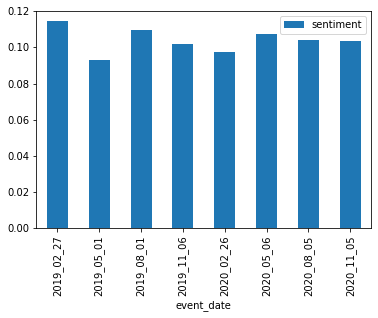

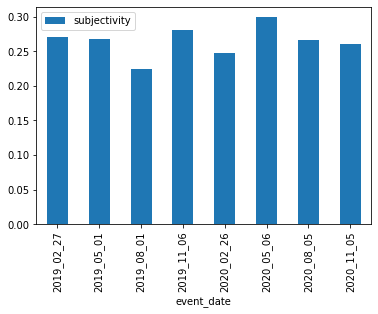

In [127]:
df_sentences = pd.concat(list_all_sentences)
df_sentences.groupby('event_date').mean().reset_index().plot(x='event_date',y='sentiment',kind='bar')
df_sentences.groupby('event_date').mean().reset_index().plot(x='event_date',y='subjectivity',kind='bar')

In [133]:
df_phrases = pd.concat(list_all_phrases)
df_phrases['count']=df_phrases['count'].astype(float)
df_phrases.groupby('phrase').sum().sort_values('count',ascending=False)

,count
phrase,
cash app,327.0
gpv,115.0
seller,115.0
cash card,101.0
% year-over-year,84.0
...,...
key priority,1.0
key piece,1.0
boosts,1.0


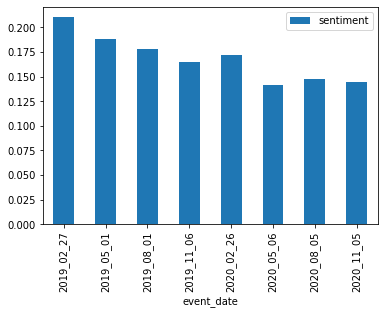

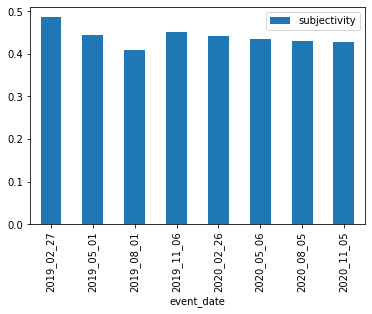

In [134]:

df_phrases['sentiment']=df_phrases['sentiment'].astype(float)
df_phrases['subjectivity']=df_phrases['subjectivity'].astype(float)
df_phrases.groupby('event_date').mean().reset_index().plot(x='event_date',y='sentiment',kind='bar')
df_phrases.groupby('event_date').mean().reset_index().plot(x='event_date',y='subjectivity',kind='bar')


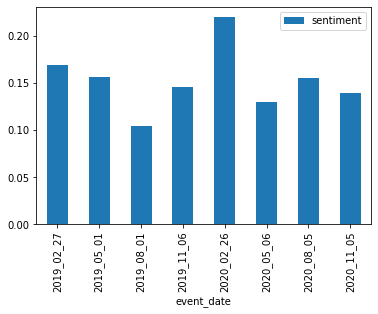

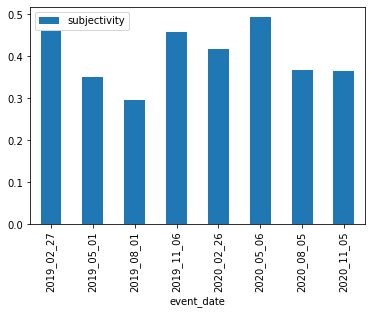

In [140]:
df_phrases['event_date']=df_phrases['event_date'].astype(str)
df_phrases[df_phrases['phrase']=='cash app'].sort_values('event_date').plot(x='event_date',y='sentiment',kind = 'bar')
df_phrases[df_phrases['phrase']=='cash app'].sort_values('event_date').plot(x='event_date',y='subjectivity',kind = 'bar')
#df_phrases[df_phrases['phrase']=='cash app'].plot(x='event_date',y='subjectivity',kind = 'bar')

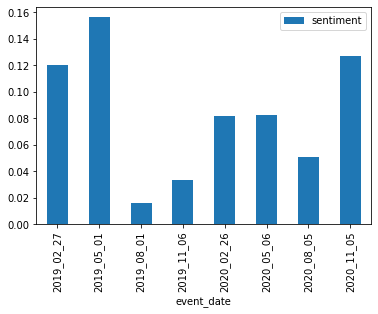

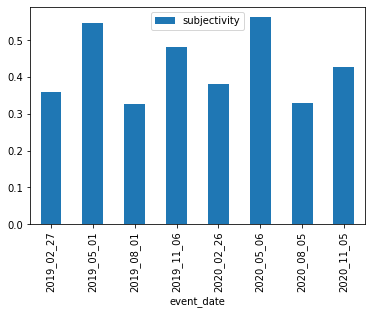

In [141]:
df_phrases[df_phrases['phrase']=='cash card'].sort_values('event_date').plot(x='event_date',y='sentiment',kind = 'bar')
df_phrases[df_phrases['phrase']=='cash card'].sort_values('event_date').plot(x='event_date',y='subjectivity',kind = 'bar')


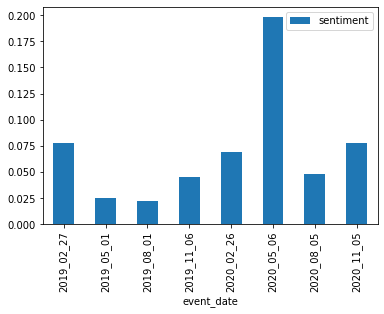

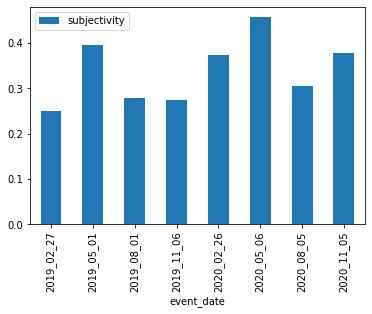

In [139]:
df_phrases[df_phrases['phrase']=='gpv'].sort_values('event_date').plot(x='event_date',y='sentiment',kind = 'bar')
df_phrases[df_phrases['phrase']=='gpv'].sort_values('event_date').plot(x='event_date',y='subjectivity',kind = 'bar')
